In [1]:
import pandas as pd
import openpyxl as op
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('fifa22.xlsx')
df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [3]:
df= df.drop(columns=['nation_jersey_number','club_loaned_from','player_tags','sofifa_id','club_contract_valid_until','club_jersey_number','player_url','player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'])

In [4]:
df.columns

Index(['short_name', 'long_name', 'player_positions', 'overall', 'potential',
       'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg',
       'club_team_id', 'club_name', 'league_name', 'league_level',
       'club_position', 'club_joined', 'nationality_id', 'nationality_name',
       'nation_team_id', 'nation_position', 'preferred_foot', 'weak_foot',
       'skill_moves', 'international_reputation', 'work_rate', 'body_type',
       'real_face', 'release_clause_eur', 'player_traits', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_st

In [5]:
df.head()

,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,...,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,...,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,...,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
3,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,...,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
4,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,1991-06-28,181,...,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3


In [7]:
df.isnull().sum()

short_name          0
long_name           0
player_positions    0
overall             0
potential           0
                   ..
lcb                 0
cb                  0
rcb                 0
rb                  0
gk                  0
Length: 98, dtype: int64

In [8]:
df.columns

Index(['short_name', 'long_name', 'player_positions', 'overall', 'potential',
       'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg',
       'club_team_id', 'club_name', 'league_name', 'league_level',
       'club_position', 'club_joined', 'nationality_id', 'nationality_name',
       'nation_team_id', 'nation_position', 'preferred_foot', 'weak_foot',
       'skill_moves', 'international_reputation', 'work_rate', 'body_type',
       'real_face', 'release_clause_eur', 'player_traits', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_st

In [11]:
df.shape

(19239, 98)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 98 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   short_name                   19239 non-null  object        
 1   long_name                    19239 non-null  object        
 2   player_positions             19239 non-null  object        
 3   overall                      19239 non-null  int64         
 4   potential                    19239 non-null  int64         
 5   value_eur                    19165 non-null  float64       
 6   wage_eur                     19178 non-null  float64       
 7   age                          19239 non-null  int64         
 8   dob                          19239 non-null  datetime64[ns]
 9   height_cm                    19239 non-null  int64         
 10  weight_kg                    19239 non-null  int64         
 11  club_team_id                 19178 non-nu

In [13]:
duplicates=df.duplicated().sum()
print(duplicates)

0


In [14]:
df.describe

<bound method NDFrame.describe of                short_name                            long_name  \
0                L. Messi       Lionel Andrés Messi Cuccittini   
1          R. Lewandowski                   Robert Lewandowski   
2       Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   
3               Neymar Jr        Neymar da Silva Santos Júnior   
4            K. De Bruyne                      Kevin De Bruyne   
...                   ...                                  ...   
19234           Song Defu                                  宋德福   
19235           C. Porter                      Caoimhin Porter   
19236            N. Logue              Nathan Logue-Cunningham   
19237           L. Rudden                          Luke Rudden   
19238  E. Lalchhanchhuaha              Emanuel Lalchhanchhuaha   

      player_positions  overall  potential    value_eur  wage_eur  age  \
0           RW, ST, CF       93         93   78000000.0  320000.0   34   
1                   ST   

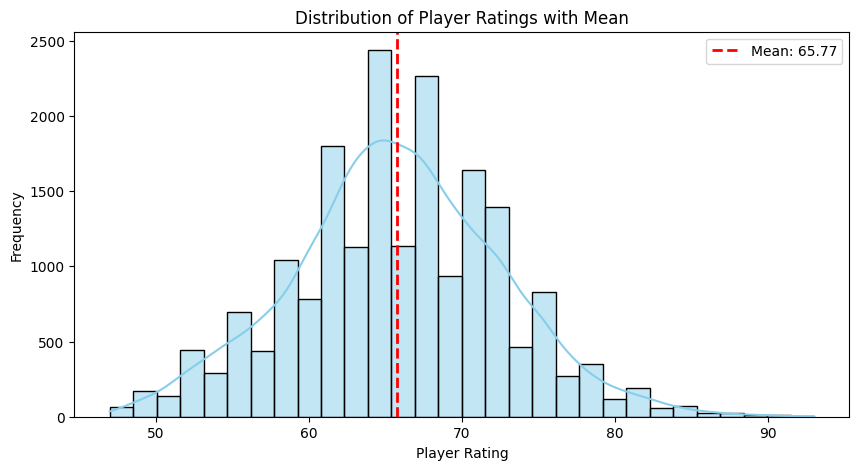

In [9]:
mean_rating = df['overall'].mean()
plt.figure(figsize=(10, 5))
sns.histplot(df['overall'], bins=30, kde=True, color='skyblue')

# Add a vertical line for the mean
plt.axvline(mean_rating, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_rating:.2f}')

# Labels and Title
plt.xlabel('Player Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Player Ratings with Mean')
plt.legend()

# Show the plot
plt.show()

66.0


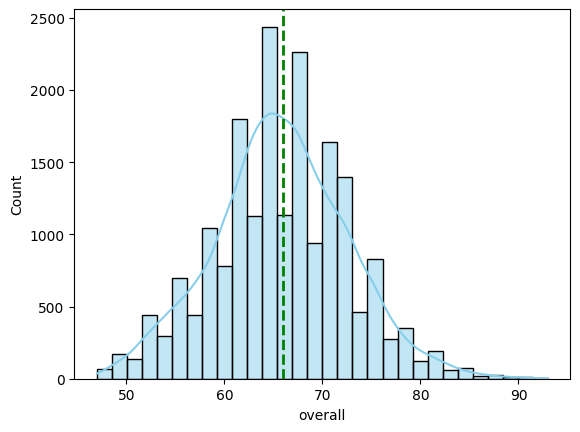

In [20]:
median_rating = df['overall'].median()
print(median_rating)

sns.histplot(df['overall'], bins=30, kde=True, color='skyblue')
plt.axvline(median_rating, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_rating:.2f}')


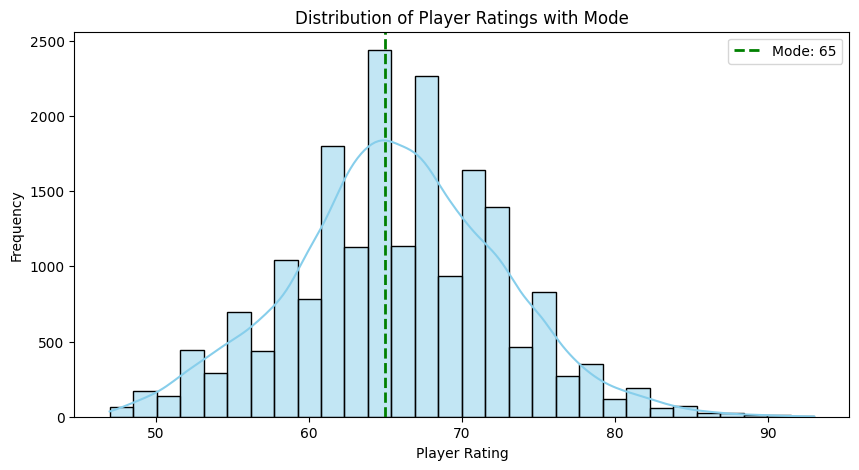

In [23]:
mode_rating = df['overall'].mode()[0]  

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['overall'], bins=30, kde=True, color='skyblue')

# Add vertical line for mode
plt.axvline(mode_rating, color='green', linestyle='dashed', linewidth=2, label=f'Mode: {mode_rating}')

# Labels and Title
plt.xlabel('Player Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Player Ratings with Mode')
plt.legend()

Range of Player Ratings: 46


Text(0.5, 0, 'Player Rating')

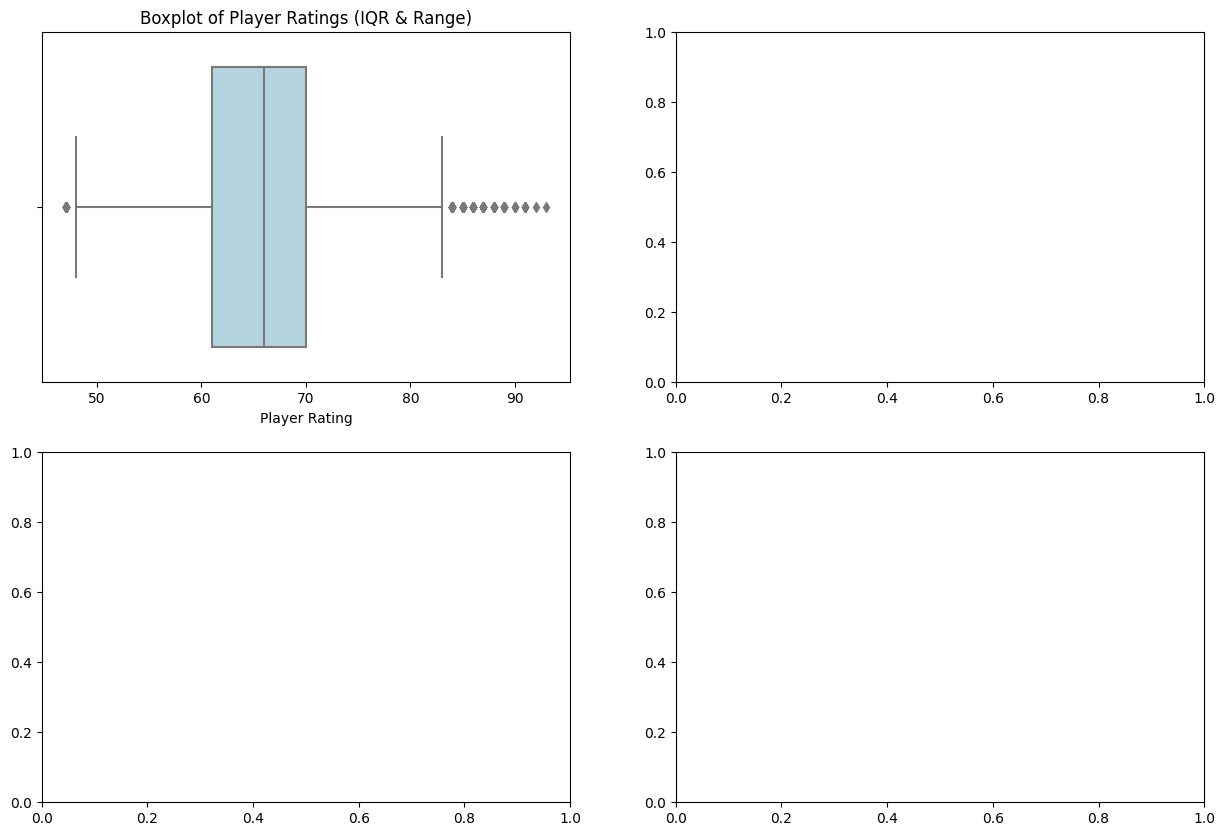

In [27]:
#theory :Range=Max Value−Min Value

range_value = df['overall'].max() - df['overall'].min()
print("Range of Player Ratings:", range_value)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(x=df['overall'], color='lightblue', ax=axes[0, 0])
axes[0, 0].set_title("Boxplot of Player Ratings (IQR & Range)")
axes[0, 0].set_xlabel("Player Rating")

In [25]:
# Variance :Variance tells us how far the ratings are from the average in squared units.
#σ^2= ∑[(x i−μ)^2]/N
 
variance_value = df['overall'].var()
print("Variance of Player Ratings:", variance_value)



Variance of Player Ratings: 47.33758558801227


In [28]:
std_dev = df['overall'].std()
print("Standard Deviation of Player Ratings:", std_dev)


Standard Deviation of Player Ratings: 6.880231506861689


In [29]:
Q1 = df['overall'].quantile(0.25)
Q3 = df['overall'].quantile(0.75)
IQR = Q3 - Q1
print("Interquartile Range (IQR):", IQR)


Interquartile Range (IQR): 9.0
